In [2]:
import os
import re
import pandas as pd
import dtale
import sacrebleu
import comet

project_dir = os.path.join(os.path.abspath(''), os.pardir)


MODEL = "ollama_chat/mistral"
N_SAMPLES = 1000

out_path = f"results/{MODEL}/{N_SAMPLES}-zero_shot.parquet"

ZERO_SHOT_RESULT_PATH = os.path.join(
    project_dir,
    "src",
    "results",
    "ollama_chat",
    "mistral",
    "1000-zero_shot.parquet"
)


df = pd.read_parquet(ZERO_SHOT_RESULT_PATH)
display(df)


c:\Users\camb7\anaconda3\envs\thesis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



,out_txt,source_text,target_text,romanized_text,translated_text,bleu_scores
0,Romanization: Ikumik: Inuktitut.\nTranslation...,ᐃᓚᖏᑦ ᑲᑎᒪᔩᑦ: ᐊᖏᖅᐳᒍᑦ.,Some Members: Agreed.,Ikumik: Inuktitut.,,0.0
1,"Romanization: Iqaluit, Sivunittutit Qikiqtani...","ᐃᒃᓯᕙᐅᑖᖅ, ᑲᔪᓯᔪᒪᔪᒍᑦ ᕿᒥᕐᕈᓂᑦᑎᓐᓂ ᒪᓕᒐᒃᓴᖅ 25, ᑭᖑᓂᐊᒍᑦ ...","Mr. Chairman, we wish to continue with the rev...","Iqaluit, Sivunittutit Qikiqtani 25, Inuusiq Qi...",,0.0
2,Romanization: Ikumik Iqaluit 031 - 4(3): Sina...,ᑎᑎᖅᑲᒃᑯᑦ ᐊᐱᖅᑯᑦ 031 - 4(3): ᐱᔮᖅᑯᑕᒥᒃ ᓱᕋᐃᔭᕈᑎᒥᓃᑦ ᐃᓄ...,Written Question 031 – 4(3): Vandalism-related...,Ikumik Iqaluit 031 - 4(3): Sinaaqtuq Qaujimaja...,,0.0
3,"Romanization: Ikumik iluilliarniq, inuktitut ...",ᒫᓐᓇ ᕿᒥᕐᕈᐊᖅᑕᐅᔫᒐᓗᐊᖅ ᑖᑉᑯᐊ ᐃᓕᔭᐅᒐᔭᕐᒪᖔᑕ ᑕᐃᒃᑯᐊ ᐃᒪᕐᒧᑦ ...,It is being looked at right now to see if the ...,"Ikumik iluilliarniq, inuktitut sinaalluarniq, ...",,0.0
4,Romanization: Sivuniksavut ittusiartut sinaan...,ᑲᑎᒪᔨᕋᓛᑦ ᑐᒃᓯᕌᖃᖅᐳᑦ ᒐᕙᒪᒃᑯᑦ ᑭᒡᒍᑎᓂᒃ ᓴᖅᑭᑦᑎᓗᑎᒃ ᐅᑯᓄᖓ ᐅ...,"Mr. Speaker, I would note for the record that ...",Sivuniksavut ittusiartut sinaaniqatigiit 91(5)...,,0.0
...,...,...,...,...,...,...
995,"Romanization: Sivuniksavut, Sinaalluusiit pin...","ᐅᖃᖅᑏ, ᐱᓕᕆᒃᑲᓐᓂᕈᓐᓇᕋᓗᐊᕋᑦᑕ ᒪᒃᑯᒃᑐᑦ ᑕᒪᒃᑯᐊ ᐃᑲᔪᖅᑕᐅᓗᑎᒃ ...","Mr. Speaker, I believe more could be done to h...","Sivuniksavut, Sinaalluusiit pingaqtuq piqquqsi...",,0.0
996,"Romanization: Iqaluit-ilirniq-mik, Sivunittut...",ᐊᐅᓪᓚᖃᑦᑕᕐᒥᖕᒪᑕ ᐱᓐᖑᐊᕆᐊᖅᑐᖅᖢᑎᒃ ᐊᑭᑦᑐᕋᐅᑎᔭᖅᑐᖅᖢᑎᒃ ᒪᒃᑯᒃᑐ...,"Mr. Speaker, being able to travel and compete ...","Iqaluit-ilirniq-mik, Sivunittut-piniartit-mik,...",,0.0
997,"Romanization: Ikumik 29, Ikumik ilujjuqitunng...","ᒪᓕᒐᒃᓴᖅ 29, ᒪᓕᒐᖅ ᐋᖅᑭᒋᐊᖅᑕᐅᖁᓪᓗᒍ ᓄᓇᒃᑰᔫᓕᕆᓂᕐᒧᑦ ᒪᓕᒐᖅ,...","Bill 29, An Act to Amend the Motor Vehicles Ac...","Ikumik 29, Ikumik ilujjuqitunngit 1.",,0.0
998,Romanization: Sivuniksavut ittusiartutit sina...,ᓄᓇᑉᑎᓐᓄᑦ ᐱᖅᐱᐊᓕᒪᐃᒻᒪᑦ ᐃᓛᓐᓂ ᐋᓪᓚᓐᖏᖅᐸᓕᖅᐸᒃᑕᕗᑦ ᑖᑉᑯᐊᑦ ᒪ...,It is hard to review every law as we can only ...,Sivuniksavut ittusiartutit sinaalluarniq piqqu...,,0.0


In [7]:
missing_romanization = 0
missing_translation = 0

for i, row in df.iterrows():
    output_text = row["out_txt"]
    source_text = row["source_text"]
    target_text = row["target_text"]
    
    # print("\nOUTPUT TEXT:\n", output_text)
    #TODO continue to refine regex, or bite bullet and manually fix entries
    romanized_match = re.search(r"(?:Romanization: |Romanization:\n|Romanization:\*\*\n\n|Romanization:\*\*\n|Romanization:\*\*|Romanization\*\*\n\n|Romanization\*\*\n)(.+?)\n", output_text)
    if romanized_match:
        #this step aims to remove all additional boilerplate text
        romanized_match_text = romanized_match[1].strip(" ").removeprefix("Text: ").removeprefix("Romanized: ").removeprefix("Romanization: ").strip("\"[]")
        print("ROMANIZED MATCH: ",romanized_match_text)
        df.at[i, "romanized_text"] = romanized_match_text
    else:
        print("\nOUTPUT TEXT:\n", output_text)
        print("NO ROMANIZATION MATCHES FOUND!")
        missing_romanization += 1
        df.at[i, "romanized_text"] = ""
    
    translated_match = re.search(r"(?:Translation: |Translation:\n|Translation:\*\*\n\n|Translation:\*\*\n|Translation:\*\* |Translation\*\*\n\n|Translation\*\*\n)(.+?)($|\n)", output_text)
    if translated_match:
        #this step aims to remove all additional boilerplate text
        translated_match_text = translated_match[1].strip(" ").removeprefix("Text: ").removeprefix("Translation: ").strip("\"[]")
        print("TRANSLATED MATCH: ", translated_match_text)
        df.at[i, "translated_text"] = translated_match_text
    else:
        print("\nOUTPUT TEXT:\n", output_text)
        print("NO TRANSLATION MATCHES FOUND!")
        missing_translation +=1
        df.at[i, "translated_text"] = ""

print("Number of entries missing romanization: ",missing_romanization)
print("Number of entries missing translation: ", missing_translation)


ROMANIZED MATCH:  Ikumik: Inuktitut.
TRANSLATED MATCH:  Hello: Inuktitut.
ROMANIZED MATCH:  Iqaluit, Sivunittutit Qikiqtani 25, Inuusiq Qikiqtani 29.
TRANSLATED MATCH:  People from Iqaluit, the Qikiqtani region are 25 years old, and one person from the Qikiqtani region is 29 years old.
ROMANIZED MATCH:  Ikumik Iqaluit 031 - 4(3): Sinaaqtuq Qaujimajatuqangit 031-4(3)
TRANSLATED MATCH:  Information about the weather forecast for Iqaluit, Nunavut on March 3.
ROMANIZED MATCH:  Ikumik iluilliarniq, inuktitut sinaalluarniq, inuinnaqtunik kijjait, inukpuq atuagagdlu, inuusivutit, nunaat sakkutik.
TRANSLATED MATCH:  The Inuit language is our language, the Inuit way of life, our culture, our tradition, our land.
ROMANIZED MATCH:  Sivuniksavut ittusiartut sinaaniqatigiit 91(5) silaqtuttuq piniqtuq pitqussiniq.
TRANSLATED MATCH:  Students are going to school number 91(5) tomorrow.
ROMANIZED MATCH:  Ikumik Qikiqtani Nunanga Inuit Kijiuqatigiit-tut?
TRANSLATED MATCH:  Who are you from the Qikiqtani

In [8]:
# move dataframe to excel for manual correction
out_path = "C:/Users/camb7/code-repos/indigenous-mt/src/results/ollama_chat/mistral/1000-zero_shot.xlsx"
df.to_excel(out_path)

In [3]:
# load cleaned data
cleaned_path = "C:/Users/camb7/code-repos/indigenous-mt/src/results/ollama_chat/mistral/1000-zero_shot-CLEANED.xlsx"
clean_df = pd.read_excel(cleaned_path, na_filter=False)
display(clean_df)

,Unnamed: 0,out_txt,source_text,target_text,romanized_text,translated_text
0,0,Romanization: Ikumik: Inuktitut.\nTranslation...,ᐃᓚᖏᑦ ᑲᑎᒪᔩᑦ: ᐊᖏᖅᐳᒍᑦ.,Some Members: Agreed.,Ikumik: Inuktitut.,Hello: Inuktitut.
1,1,"Romanization: Iqaluit, Sivunittutit Qikiqtani...","ᐃᒃᓯᕙᐅᑖᖅ, ᑲᔪᓯᔪᒪᔪᒍᑦ ᕿᒥᕐᕈᓂᑦᑎᓐᓂ ᒪᓕᒐᒃᓴᖅ 25, ᑭᖑᓂᐊᒍᑦ ...","Mr. Chairman, we wish to continue with the rev...","Iqaluit, Sivunittutit Qikiqtani 25, Inuusiq Qi...","People from Iqaluit, the Qikiqtani region are ..."
2,2,Romanization: Ikumik Iqaluit 031 - 4(3): Sina...,ᑎᑎᖅᑲᒃᑯᑦ ᐊᐱᖅᑯᑦ 031 - 4(3): ᐱᔮᖅᑯᑕᒥᒃ ᓱᕋᐃᔭᕈᑎᒥᓃᑦ ᐃᓄ...,Written Question 031 – 4(3): Vandalism-related...,Ikumik Iqaluit 031 - 4(3): Sinaaqtuq Qaujimaja...,Information about the weather forecast for Iqa...
3,3,"Romanization: Ikumik iluilliarniq, inuktitut ...",ᒫᓐᓇ ᕿᒥᕐᕈᐊᖅᑕᐅᔫᒐᓗᐊᖅ ᑖᑉᑯᐊ ᐃᓕᔭᐅᒐᔭᕐᒪᖔᑕ ᑕᐃᒃᑯᐊ ᐃᒪᕐᒧᑦ ...,It is being looked at right now to see if the ...,"Ikumik iluilliarniq, inuktitut sinaalluarniq, ...","The Inuit language is our language, the Inuit ..."
4,4,Romanization: Sivuniksavut ittusiartut sinaan...,ᑲᑎᒪᔨᕋᓛᑦ ᑐᒃᓯᕌᖃᖅᐳᑦ ᒐᕙᒪᒃᑯᑦ ᑭᒡᒍᑎᓂᒃ ᓴᖅᑭᑦᑎᓗᑎᒃ ᐅᑯᓄᖓ ᐅ...,"Mr. Speaker, I would note for the record that ...",Sivuniksavut ittusiartut sinaaniqatigiit 91(5)...,Students are going to school number 91(5) tomo...
...,...,...,...,...,...,...
995,995,"Romanization: Sivuniksavut, Sinaalluusiit pin...","ᐅᖃᖅᑏ, ᐱᓕᕆᒃᑲᓐᓂᕈᓐᓇᕋᓗᐊᕋᑦᑕ ᒪᒃᑯᒃᑐᑦ ᑕᒪᒃᑯᐊ ᐃᑲᔪᖅᑕᐅᓗᑎᒃ ...","Mr. Speaker, I believe more could be done to h...","Sivuniksavut, Sinaalluusiit pingaqtuq piqquqsi...","Students, listen carefully to the teacher's in..."
996,996,"Romanization: Iqaluit-ilirniq-mik, Sivunittut...",ᐊᐅᓪᓚᖃᑦᑕᕐᒥᖕᒪᑕ ᐱᓐᖑᐊᕆᐊᖅᑐᖅᖢᑎᒃ ᐊᑭᑦᑐᕋᐅᑎᔭᖅᑐᖅᖢᑎᒃ ᒪᒃᑯᒃᑐ...,"Mr. Speaker, being able to travel and compete ...","Iqaluit-ilirniq-mik, Sivunittut-piniartit-mik,...","This is the place of Iqaluit, the Inuktitut sp..."
997,997,"Romanization: Ikumik 29, Ikumik ilujjuqitunng...","ᒪᓕᒐᒃᓴᖅ 29, ᒪᓕᒐᖅ ᐋᖅᑭᒋᐊᖅᑕᐅᖁᓪᓗᒍ ᓄᓇᒃᑰᔫᓕᕆᓂᕐᒧᑦ ᒪᓕᒐᖅ,...","Bill 29, An Act to Amend the Motor Vehicles Ac...","Ikumik 29, Ikumik ilujjuqitunngit 1.","The weather on the 29th was good, but on the 1..."
998,998,Romanization: Sivuniksavut ittusiartutit sina...,ᓄᓇᑉᑎᓐᓄᑦ ᐱᖅᐱᐊᓕᒪᐃᒻᒪᑦ ᐃᓛᓐᓂ ᐋᓪᓚᓐᖏᖅᐸᓕᖅᐸᒃᑕᕗᑦ ᑖᑉᑯᐊᑦ ᒪ...,It is hard to review every law as we can only ...,Sivuniksavut ittusiartutit sinaalluarniq piqqu...,The students are learning the Inuit language f...


In [5]:
from sacrebleu.metrics import BLEU, CHRF

bleu = BLEU(effective_order=True)
chrf = CHRF()

bleu_list = []
chrf_list = []


for idx, row in clean_df.iterrows():
    output_text = row["out_txt"]
    source_text = row["source_text"]
    reference = row["target_text"]
    romanized_text = row["romanized_text"]
    prediction = row["translated_text"]

    if prediction:
        bleu_score = bleu.sentence_score(prediction, [reference])
        chrf_score = chrf.sentence_score(prediction, [reference])
        bleu_list.append(bleu_score.score)
        chrf_list.append(chrf_score.score)
    if not prediction:
        print("No prediction!")
        bleu_list.append(0)
        chrf_list.append(0)
print(bleu_list)
print(chrf_list)
new_data = {'bleu_score': bleu_list,'chrF_score': chrf_list}
clean_df = clean_df.assign(**new_data)
display(clean_df)

clean_df.to_excel("C:/Users/camb7/code-repos/indigenous-mt/src/results/ollama_chat/mistral/1000-zero_shot-RESULTS.xlsx")

No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
No prediction!
[14.794015674776452, 2.46233736722218, 2.1027582541760537, 2.2731543567022867, 1.6302450740686891, 2.0540152107739, 12.991916506579948, 0.0, 4.019656738893367, 1.7557381354086663, 4.512370598495738, 2.383435987623427, 27.516060407455225, 2.2731543567022867, 2.2608914449138346, 0.0, 2.8398387225677895, 3.4089919964838553, 1.1567397485091366, 8.170609724417774, 0.0, 0.0, 1.4155619660731842, 8.643019616048525, 1.5393730252811677, 0, 4.955725306405571, 3.0297048914466935, 0.9812254443745085, 0.0, 7.809849842300637, 5.70796903405875, 6.567274736060395, 2.159701133933343, 0.0, 1.686831732533491, 0.0, 2.100559699483406, 2.8629993657668873, 4.503733751056993, 2.537856360538449, 8.392229812593097, 3.21858262703621, 6.567274736060395, 4.767707020457095, 0.0, 0.7069647113856736, 3.136424045

,Unnamed: 0,out_txt,source_text,target_text,romanized_text,translated_text,bleu_score,chrF_score
0,0,Romanization: Ikumik: Inuktitut.\nTranslation...,ᐃᓚᖏᑦ ᑲᑎᒪᔩᑦ: ᐊᖏᖅᐳᒍᑦ.,Some Members: Agreed.,Ikumik: Inuktitut.,Hello: Inuktitut.,14.794016,3.623188
1,1,"Romanization: Iqaluit, Sivunittutit Qikiqtani...","ᐃᒃᓯᕙᐅᑖᖅ, ᑲᔪᓯᔪᒪᔪᒍᑦ ᕿᒥᕐᕈᓂᑦᑎᓐᓂ ᒪᓕᒐᒃᓴᖅ 25, ᑭᖑᓂᐊᒍᑦ ...","Mr. Chairman, we wish to continue with the rev...","Iqaluit, Sivunittutit Qikiqtani 25, Inuusiq Qi...","People from Iqaluit, the Qikiqtani region are ...",2.462337,14.659540
2,2,Romanization: Ikumik Iqaluit 031 - 4(3): Sina...,ᑎᑎᖅᑲᒃᑯᑦ ᐊᐱᖅᑯᑦ 031 - 4(3): ᐱᔮᖅᑯᑕᒥᒃ ᓱᕋᐃᔭᕈᑎᒥᓃᑦ ᐃᓄ...,Written Question 031 – 4(3): Vandalism-related...,Ikumik Iqaluit 031 - 4(3): Sinaaqtuq Qaujimaja...,Information about the weather forecast for Iqa...,2.102758,11.834927
3,3,"Romanization: Ikumik iluilliarniq, inuktitut ...",ᒫᓐᓇ ᕿᒥᕐᕈᐊᖅᑕᐅᔫᒐᓗᐊᖅ ᑖᑉᑯᐊ ᐃᓕᔭᐅᒐᔭᕐᒪᖔᑕ ᑕᐃᒃᑯᐊ ᐃᒪᕐᒧᑦ ...,It is being looked at right now to see if the ...,"Ikumik iluilliarniq, inuktitut sinaalluarniq, ...","The Inuit language is our language, the Inuit ...",2.273154,14.497053
4,4,Romanization: Sivuniksavut ittusiartut sinaan...,ᑲᑎᒪᔨᕋᓛᑦ ᑐᒃᓯᕌᖃᖅᐳᑦ ᒐᕙᒪᒃᑯᑦ ᑭᒡᒍᑎᓂᒃ ᓴᖅᑭᑦᑎᓗᑎᒃ ᐅᑯᓄᖓ ᐅ...,"Mr. Speaker, I would note for the record that ...",Sivuniksavut ittusiartut sinaaniqatigiit 91(5)...,Students are going to school number 91(5) tomo...,1.630245,7.765618
...,...,...,...,...,...,...,...,...
995,995,"Romanization: Sivuniksavut, Sinaalluusiit pin...","ᐅᖃᖅᑏ, ᐱᓕᕆᒃᑲᓐᓂᕈᓐᓇᕋᓗᐊᕋᑦᑕ ᒪᒃᑯᒃᑐᑦ ᑕᒪᒃᑯᐊ ᐃᑲᔪᖅᑕᐅᓗᑎᒃ ...","Mr. Speaker, I believe more could be done to h...","Sivuniksavut, Sinaalluusiit pingaqtuq piqquqsi...","Students, listen carefully to the teacher's in...",1.627648,19.051136
996,996,"Romanization: Iqaluit-ilirniq-mik, Sivunittut...",ᐊᐅᓪᓚᖃᑦᑕᕐᒥᖕᒪᑕ ᐱᓐᖑᐊᕆᐊᖅᑐᖅᖢᑎᒃ ᐊᑭᑦᑐᕋᐅᑎᔭᖅᑐᖅᖢᑎᒃ ᒪᒃᑯᒃᑐ...,"Mr. Speaker, being able to travel and compete ...","Iqaluit-ilirniq-mik, Sivunittut-piniartit-mik,...","This is the place of Iqaluit, the Inuktitut sp...",1.476394,18.974492
997,997,"Romanization: Ikumik 29, Ikumik ilujjuqitunng...","ᒪᓕᒐᒃᓴᖅ 29, ᒪᓕᒐᖅ ᐋᖅᑭᒋᐊᖅᑕᐅᖁᓪᓗᒍ ᓄᓇᒃᑰᔫᓕᕆᓂᕐᒧᑦ ᒪᓕᒐᖅ,...","Bill 29, An Act to Amend the Motor Vehicles Ac...","Ikumik 29, Ikumik ilujjuqitunngit 1.","The weather on the 29th was good, but on the 1...",3.458592,12.465653
998,998,Romanization: Sivuniksavut ittusiartutit sina...,ᓄᓇᑉᑎᓐᓄᑦ ᐱᖅᐱᐊᓕᒪᐃᒻᒪᑦ ᐃᓛᓐᓂ ᐋᓪᓚᓐᖏᖅᐸᓕᖅᐸᒃᑕᕗᑦ ᑖᑉᑯᐊᑦ ᒪ...,It is hard to review every law as we can only ...,Sivuniksavut ittusiartutit sinaalluarniq piqqu...,The students are learning the Inuit language f...,2.094878,17.518708


In [6]:
avg_bleu = sum(bleu_list) / len(bleu_list)
print("Average BLEU:", avg_bleu)
max_bleu = max(bleu_list)
print("Max BLEU:", max_bleu)

avg_chrf = sum(chrf_list) / len(chrf_list)
print('Average chrf:',avg_chrf)
max_chrf = max(chrf_list)
print('Max chrf:', max_chrf)


Average BLEU: 4.666579921747203
Max BLEU: 55.93684915933074
Average chrf: 11.649058979731652
Max chrf: 84.90607844028708


maxp pruned
cmap pruned
post pruned
glyf pruned
Added gid0 to subset
Closing glyph list over 'glyf': 22 glyphs before
Glyph names: ['.notdef', 'a', 'b', 'c', 'd', 'e', 'g', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'y']
Glyph IDs:   [0, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92]
Closed glyph list over 'glyf': 22 glyphs after
Glyph names: ['.notdef', 'a', 'b', 'c', 'd', 'e', 'g', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'y']
Glyph IDs:   [0, 68, 69, 70, 71, 72, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92]
Retaining 22 glyphs
head subsetting not needed
hhea subsetting not needed
maxp subsetting not needed
OS/2 subsetting not needed
hmtx subsetted
cmap subsetted
fpgm subsetting not needed
prep subsetting not needed
cvt  subsetting not needed
loca subsetting not needed
post subsetted
gasp subsetting not needed
name subsetting not needed
glyf subsetted
head pruned
OS/2 Unicod

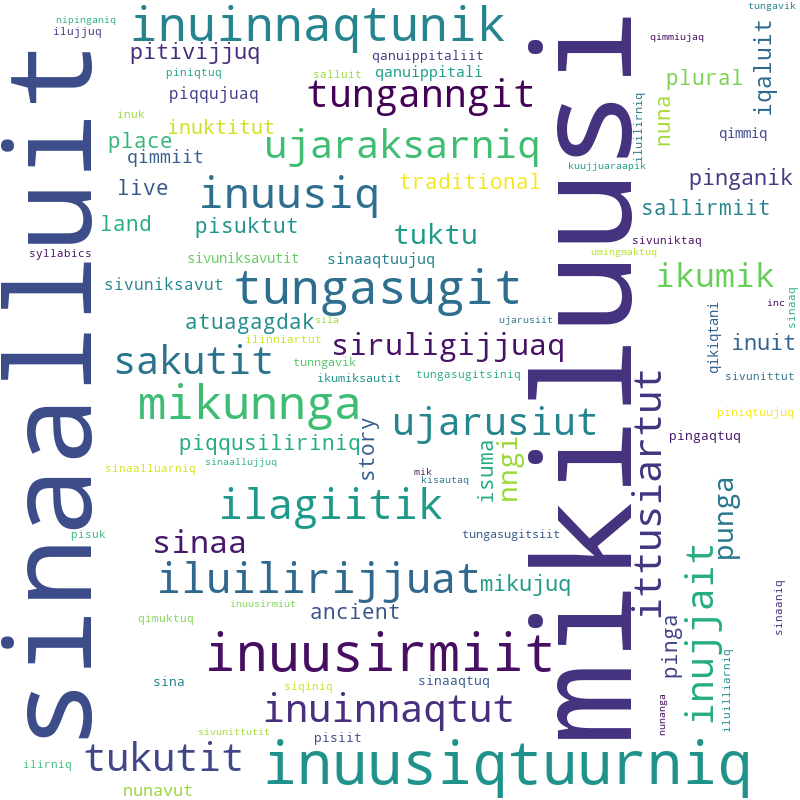

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

from matplotlib import colormaps


inuk_comment_words = ''
eng_comment_words = ''
stopwords = set(STOPWORDS)

syllabics = re.compile('[\u1400-\u167F]')

for _, row in clean_df.iterrows():
    romanized_inuktitut = str(row["romanized_text"])
    english_text = str(row["translated_text"])
    
    romanized_inuktitut = syllabics.sub('',romanized_inuktitut)
    
    romanized_tokens = romanized_inuktitut.split(",-: ")
    english_tokens = english_text.split()
    
    
    for i in range(len(romanized_tokens)):
        romanized_tokens[i] = romanized_tokens[i].lower()
    
    for i in range(len(english_tokens)):
        english_tokens[i] = english_tokens[i].lower()
        
    
    inuk_comment_words += " ".join(romanized_tokens)+" "
    eng_comment_words += " ".join(english_tokens)+" "
    


inuk_wordcloud = WordCloud(width=800, height=800, background_color="white", stopwords=stopwords, min_font_size=10, collocations=False).generate(inuk_comment_words)

eng_wordcloud = WordCloud(width=1200, height=800, background_color="white", stopwords=stopwords, min_font_size=10, collocations=False, colormap="RdPu").generate(eng_comment_words)



inuk_svg = inuk_wordcloud.to_svg(embed_font=True, optimize_embedded_font=False)

with open("C:/Users/camb7/code-repos/indigenous-mt/src/results/ollama_chat/mistral/Mistral-inuk.svg",'w') as f:
    f.write(inuk_svg)

eng_svg = eng_wordcloud.to_svg(embed_font=True, optimize_embedded_font=False)

with open("C:/Users/camb7/code-repos/indigenous-mt/src/results/ollama_chat/mistral/Mistral-eng.svg",'w') as f:
    f.write(eng_svg)
    
inuk_wordcloud.to_image()